# External modules

In [15]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [69]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [3]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [3]:
data <- xfun::in_dir(dir = path, expr = read_csv("./06_experimentation_1/final_dataset.csv"))

Rows: 22847 Columns: 59
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (59): timestamp, latitude, longitude, velocity_latitude, velocity_longit...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
str(data)

spc_tbl_ [22,847 × 59] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timestamp             : num [1:22847] 17207386 17241310 17274219 17308103 17343083 ...
 $ latitude              : num [1:22847] 48.8 48.8 48.8 48.8 48.8 ...
 $ longitude             : num [1:22847] 2.46 2.46 2.46 2.46 2.46 ...
 $ velocity_latitude     : num [1:22847] NA -4.91e-11 -3.82e-11 -3.73e-11 -4.86e-11 ...
 $ velocity_longitude    : num [1:22847] NA 9.48e-12 7.09e-12 6.72e-12 8.41e-12 ...
 $ velocity              : num [1:22847] NA 5.00e-11 3.89e-11 3.79e-11 4.93e-11 ...
 $ lateral_error         : num [1:22847] -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error    : num [1:22847] 0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error       : num [1:22847] 0.592 0.576 0.572 0.569 0.6 ...
 $ latitude_error        : num [1:22847] 4.91e-06 4.77e-06 4.73e-06 5.57e-06 4.96e-06 ...
 $ longitude_error       : num [1:22847] -1.22e-07 1.33e-07 2.49e-07 3.92e-07 5.62e-07 ...
 $ heading_error         : num [1:2284

# Impute outliers

In [17]:
x_raw <- data$lateral_error_abs

In [18]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [19]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

In [20]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [21]:
outlier_positions <- x_raw_object$outlier_positions

In [22]:
print(outlier_positions)

  [1]  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359
 [13]  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371
 [25]  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383
 [37]  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394  2395
 [49]  2396  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
 [61]  4822  4823  4824  4825  4826  4827  4828  4829 16605 16606 16607 16608
 [73] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
 [85] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
 [97] 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644
[109] 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 16655 18392
[121] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[133] 18405 18406 18407 18408 18409 18410 18411 18412 18417 18418 18419 18420
[145] 18421 18422 18423 18424 18425 18426 18427 18428 18429 1843

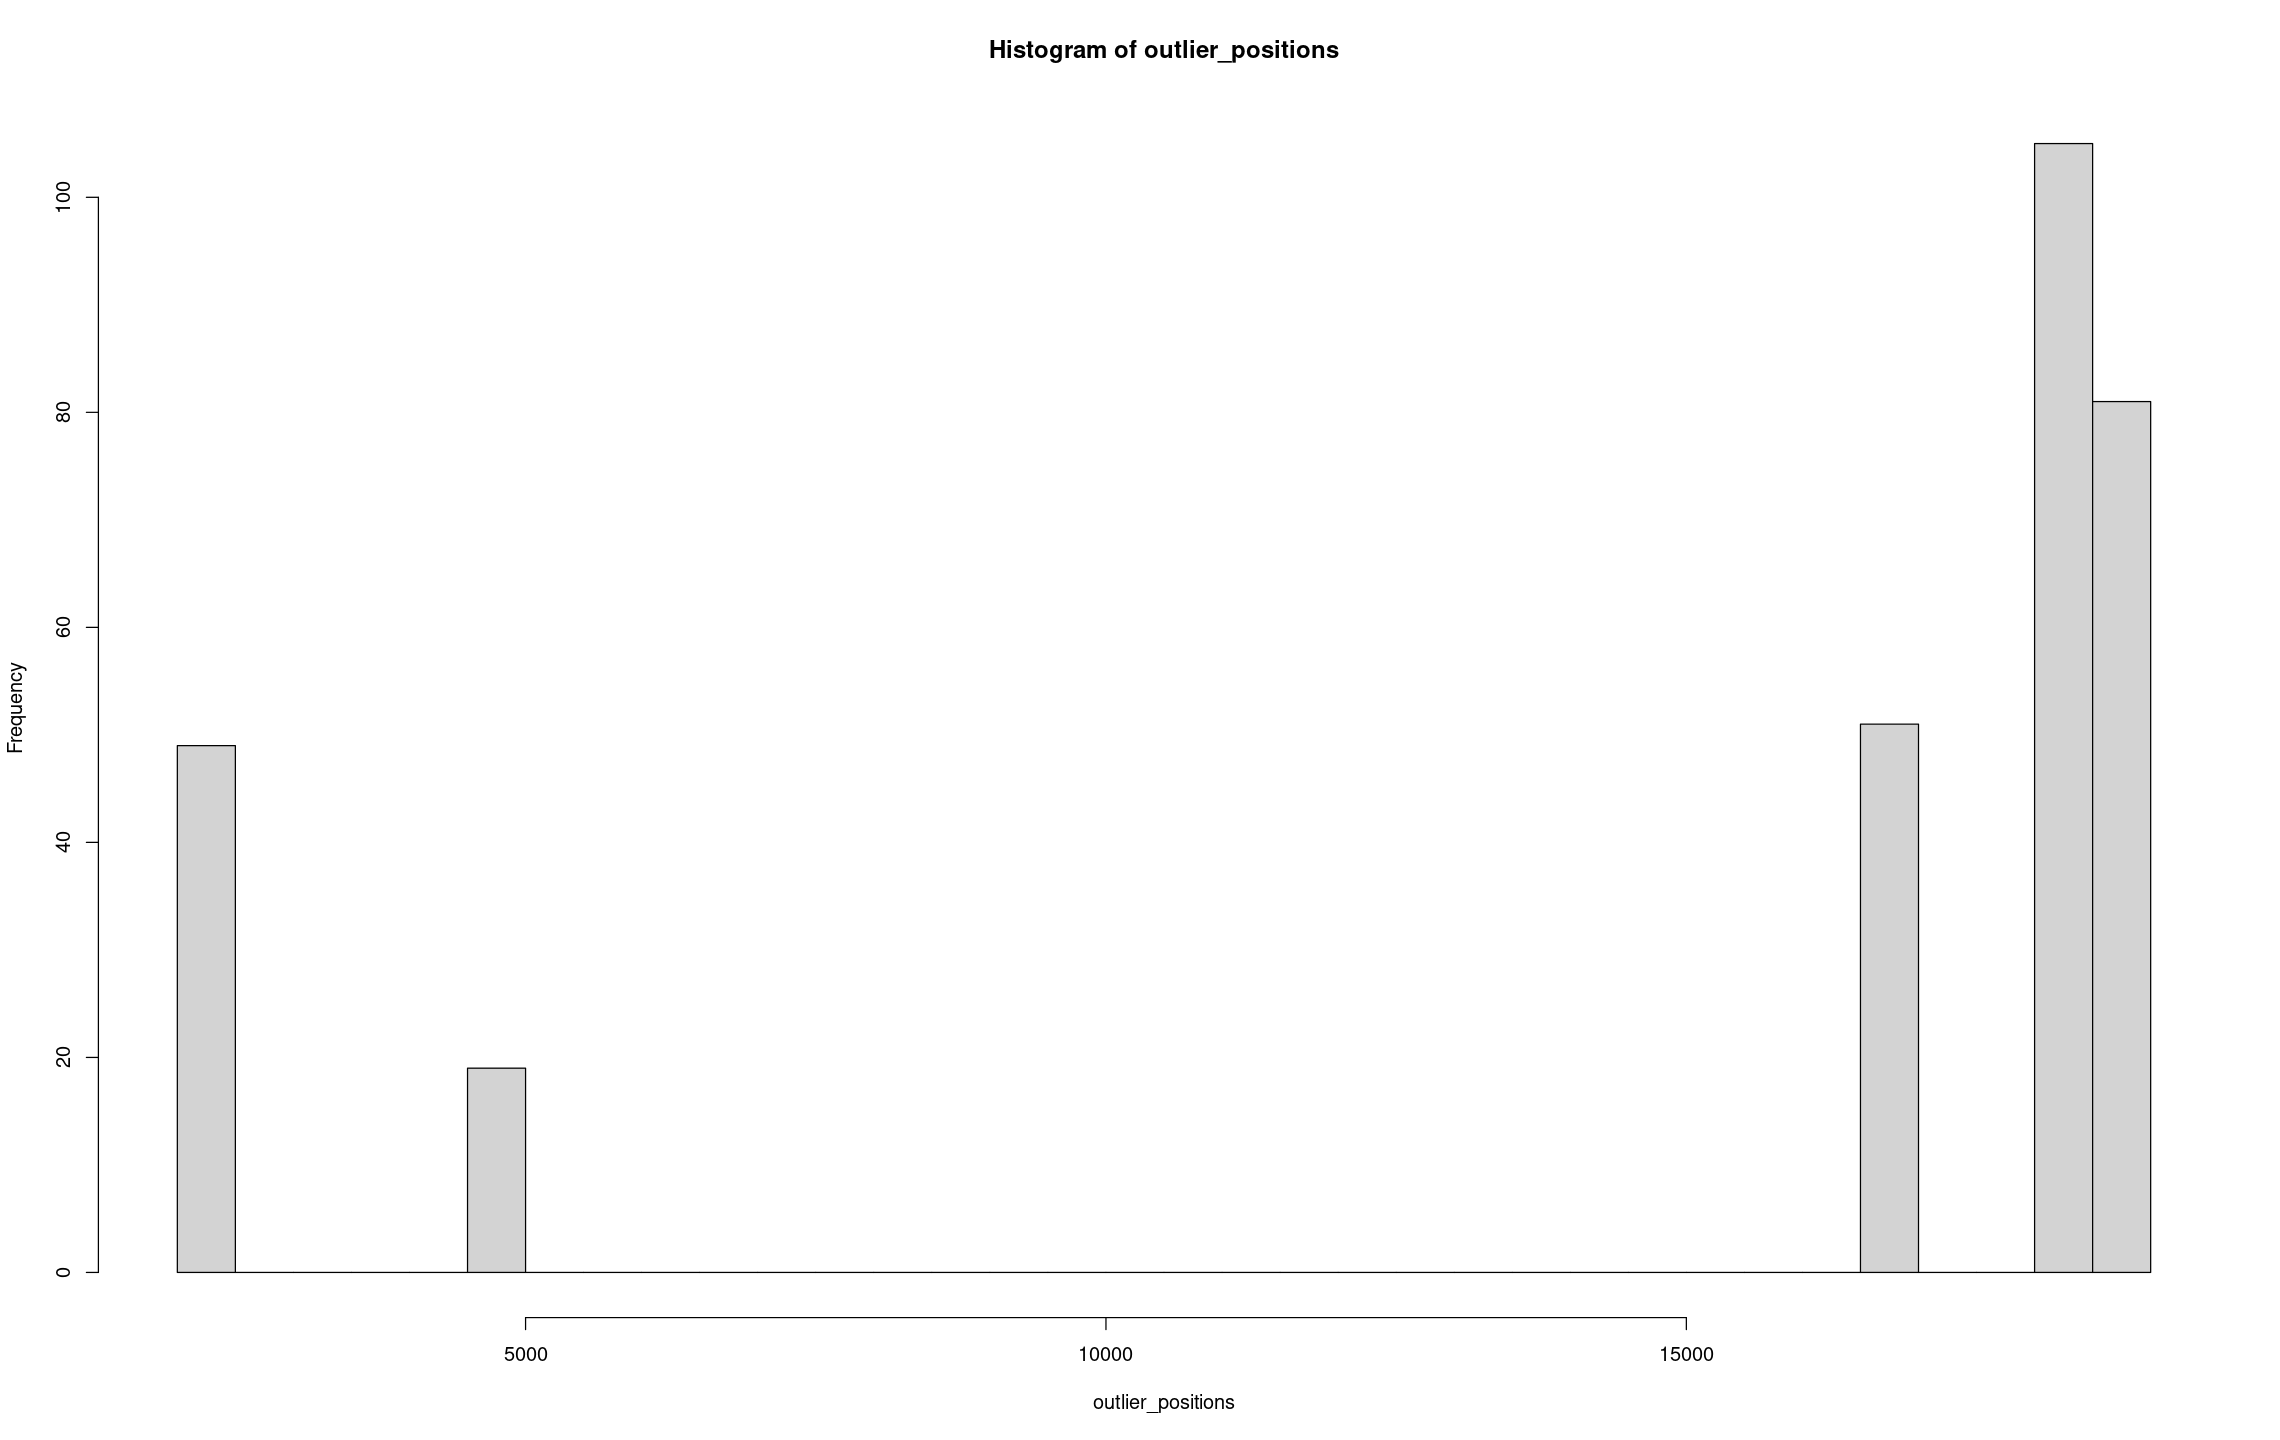

In [23]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

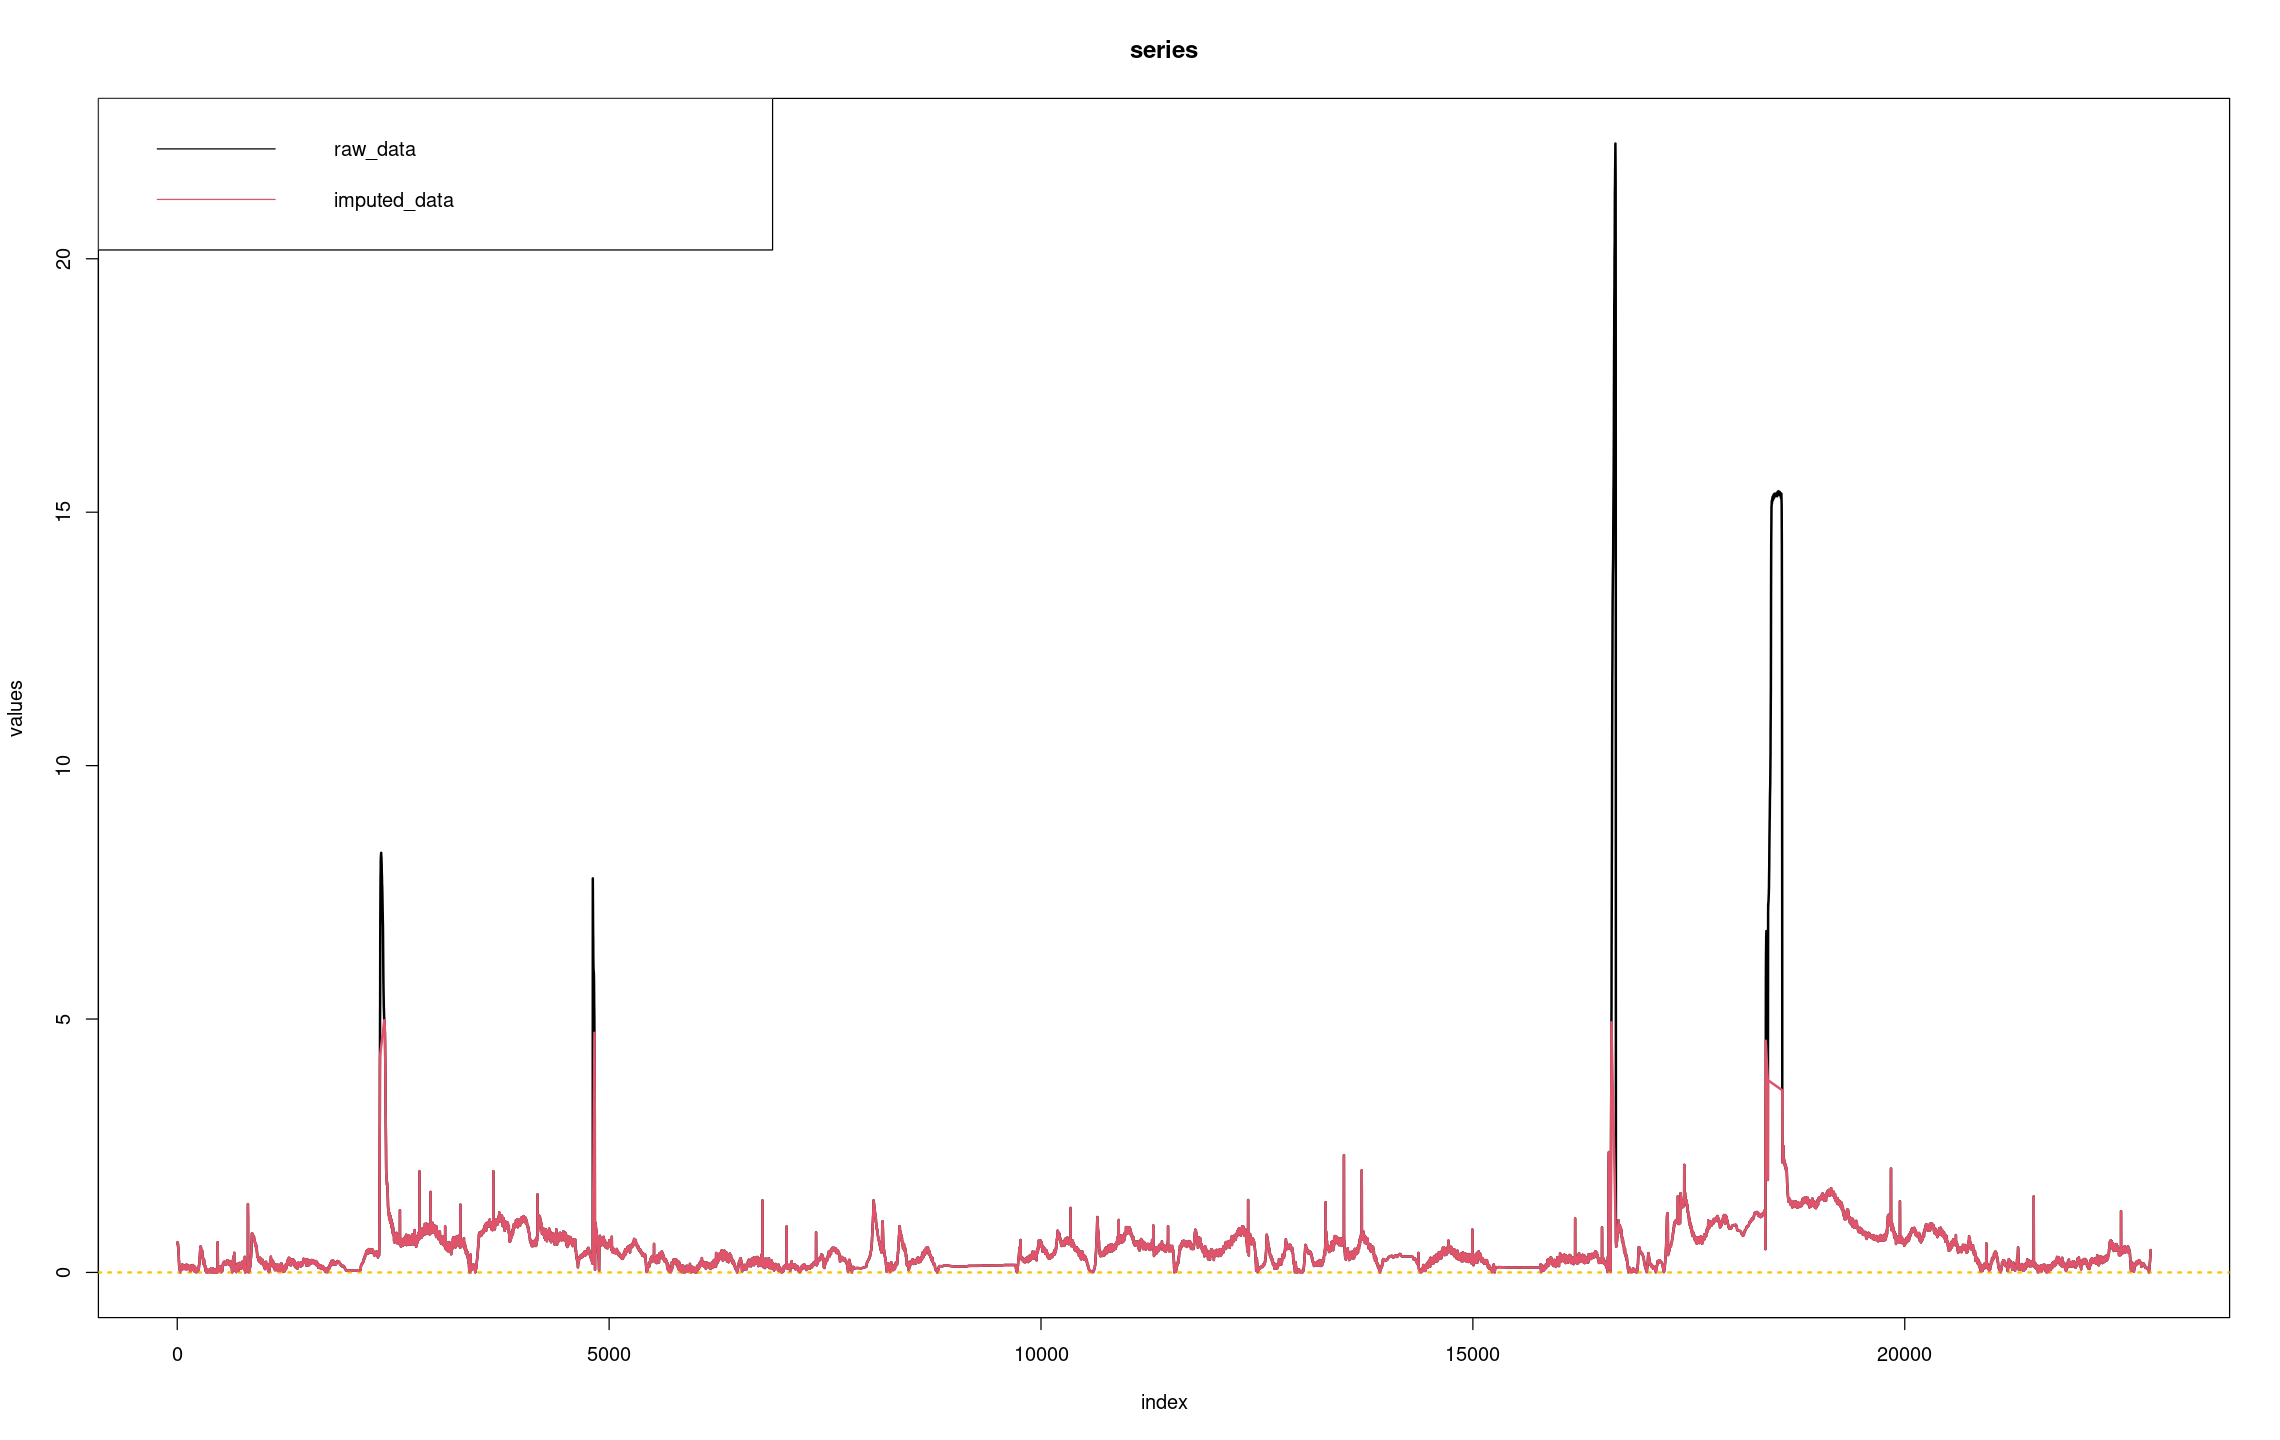

In [24]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [26]:
# data with imputed outliers
x_with_imputed_outliers <- x_raw_object$imputed_data 

In [27]:
# data with removed outliers
x_with_removed_outliers <- x_raw[-outlier_positions]
data_clean <- data[-outlier_positions, ]

# Data description

In [28]:
x <- x_with_imputed_outliers
#x <- x_with_removed_outliers
n <- length(x)

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'847           22'847                0           22'581
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0481907140464  0.0872328415513  0.1457234174015  0.3255223631860
                                                                    
            range               sd            vcoef              mad
  4.9767084120450  0.5421689620294  1.1428336973211  0.3094048471886
                                                                    
               0s             mean            meanCI
                0  0.4744075741731   0.4673769940670
             0.0%                    0.4814381542791
                                                    
    

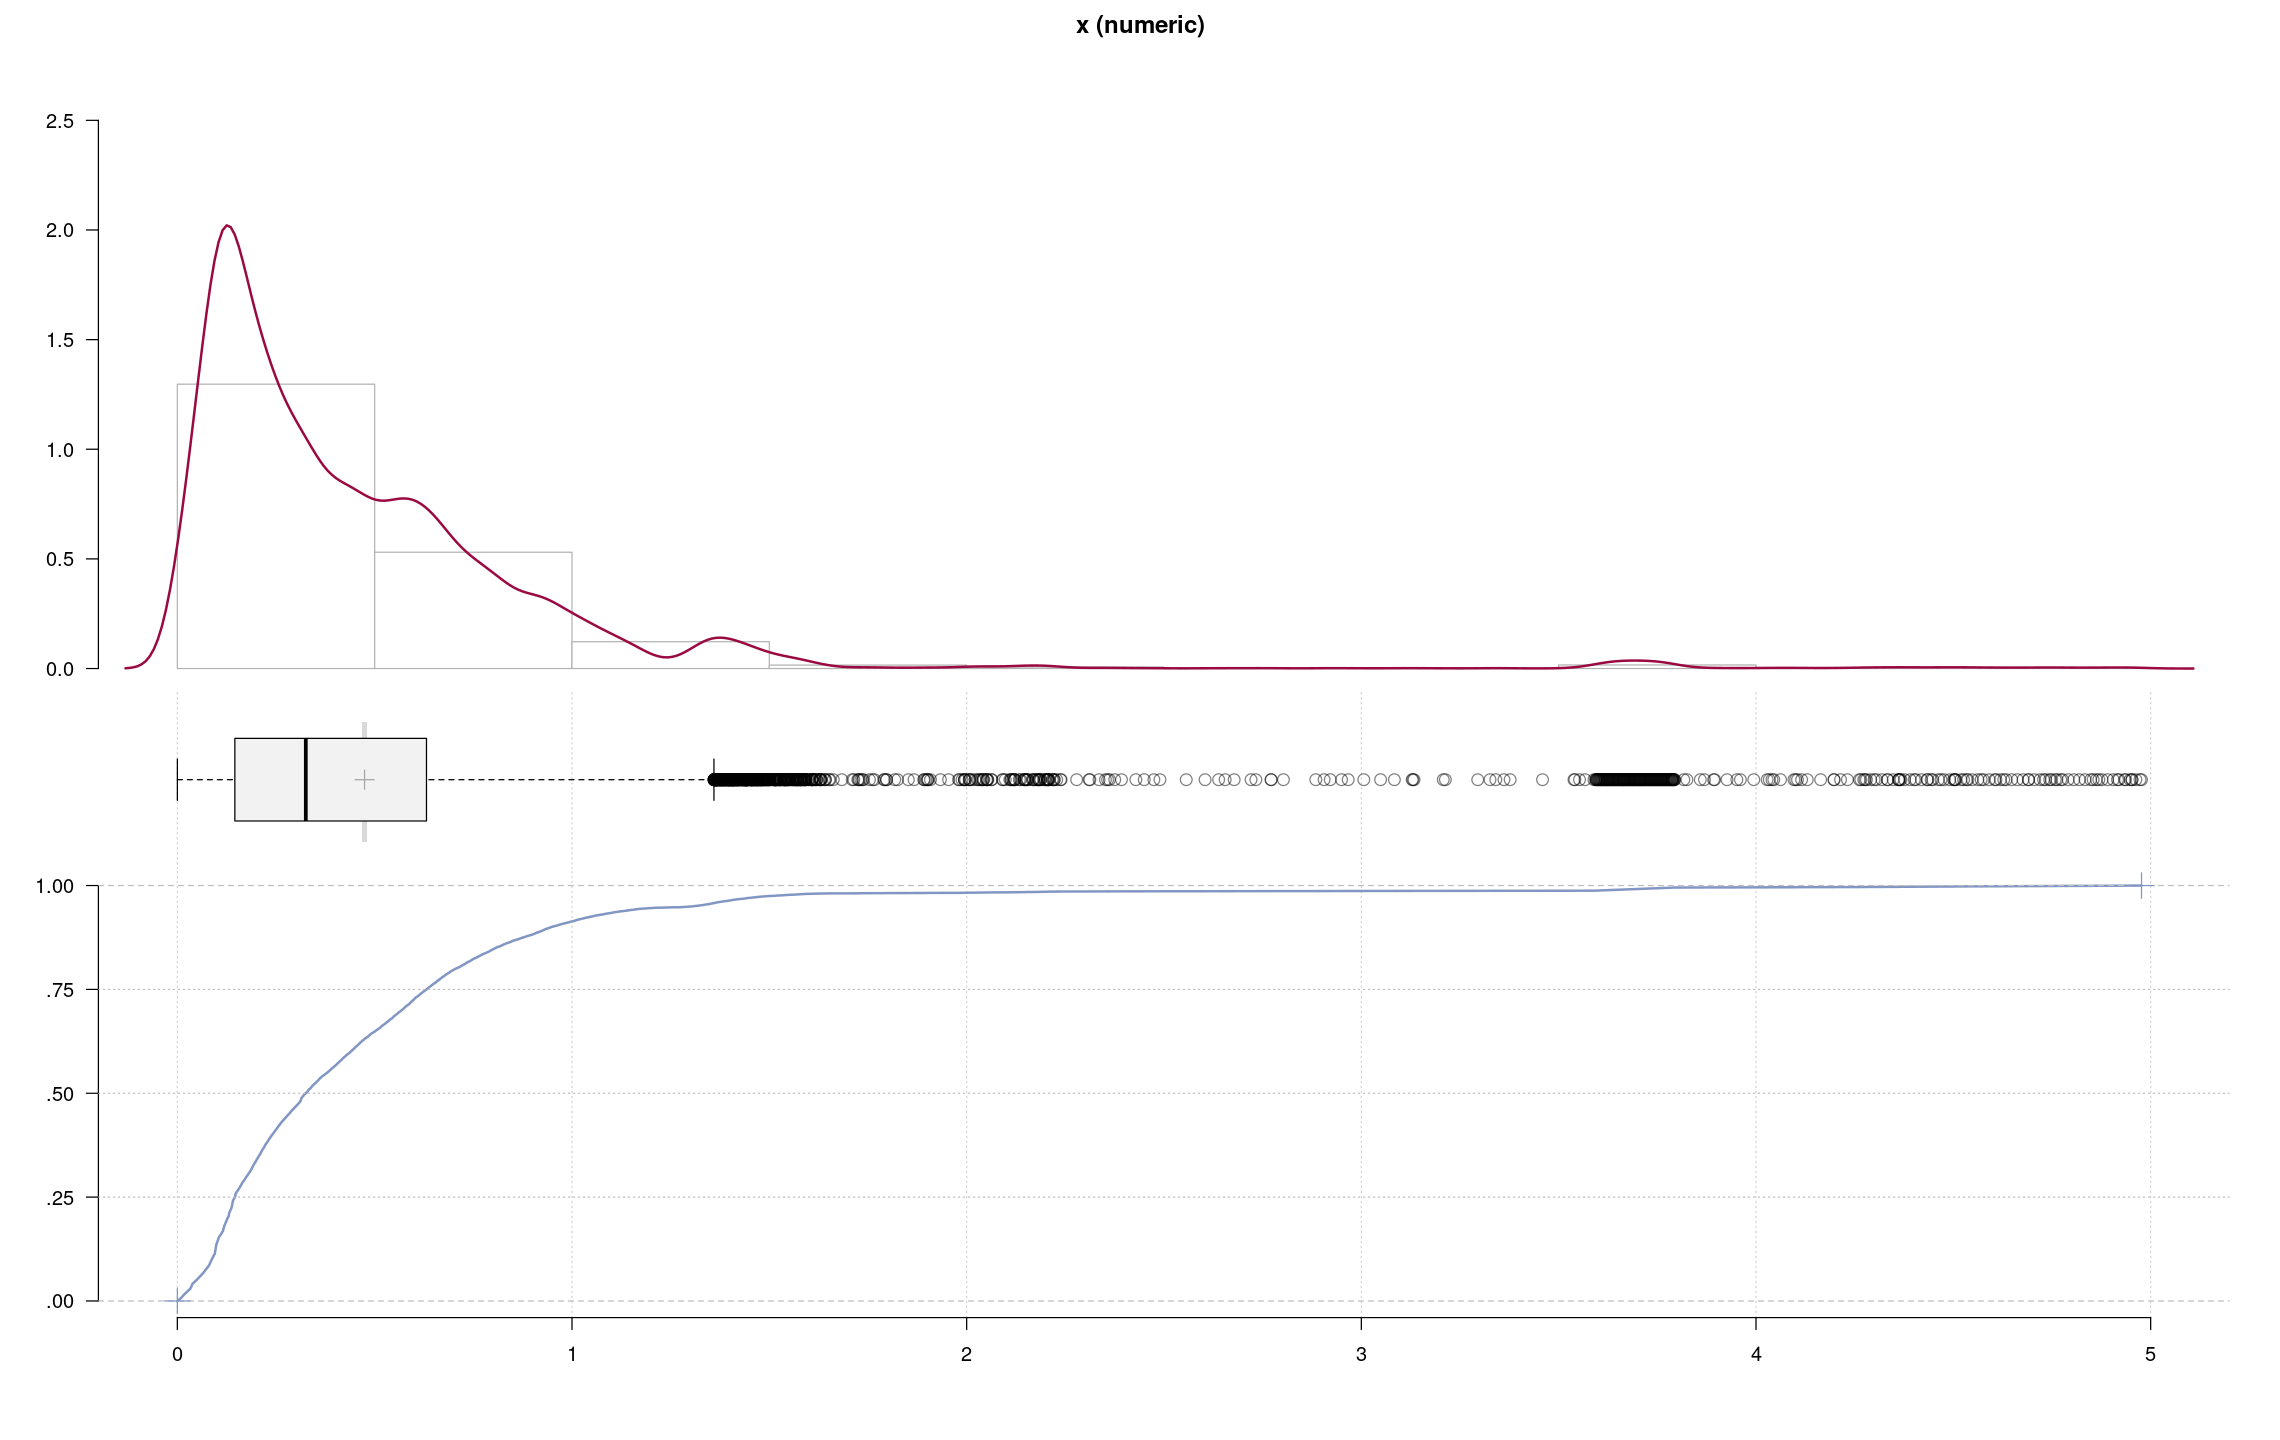

In [30]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

------------------------------------------------------------------------------ 
y (numeric)

        length             n           NAs        unique            0s'
         3'000         3'000             0           = n             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.8765672803  0.8991105735  0.9525904506  1.1000387073  1.4219199121
                                                                      
         range            sd         vcoef           mad           IQR
  4.1206932068  0.8967671469  0.6188045266  0.2917863631  0.4693294615
                                                                      
          mean        meanCI
  1.4491929329  1.4170901661
                1.4812956997
                            
           .90           .95
  2.9706681380  3.7470975355
                      

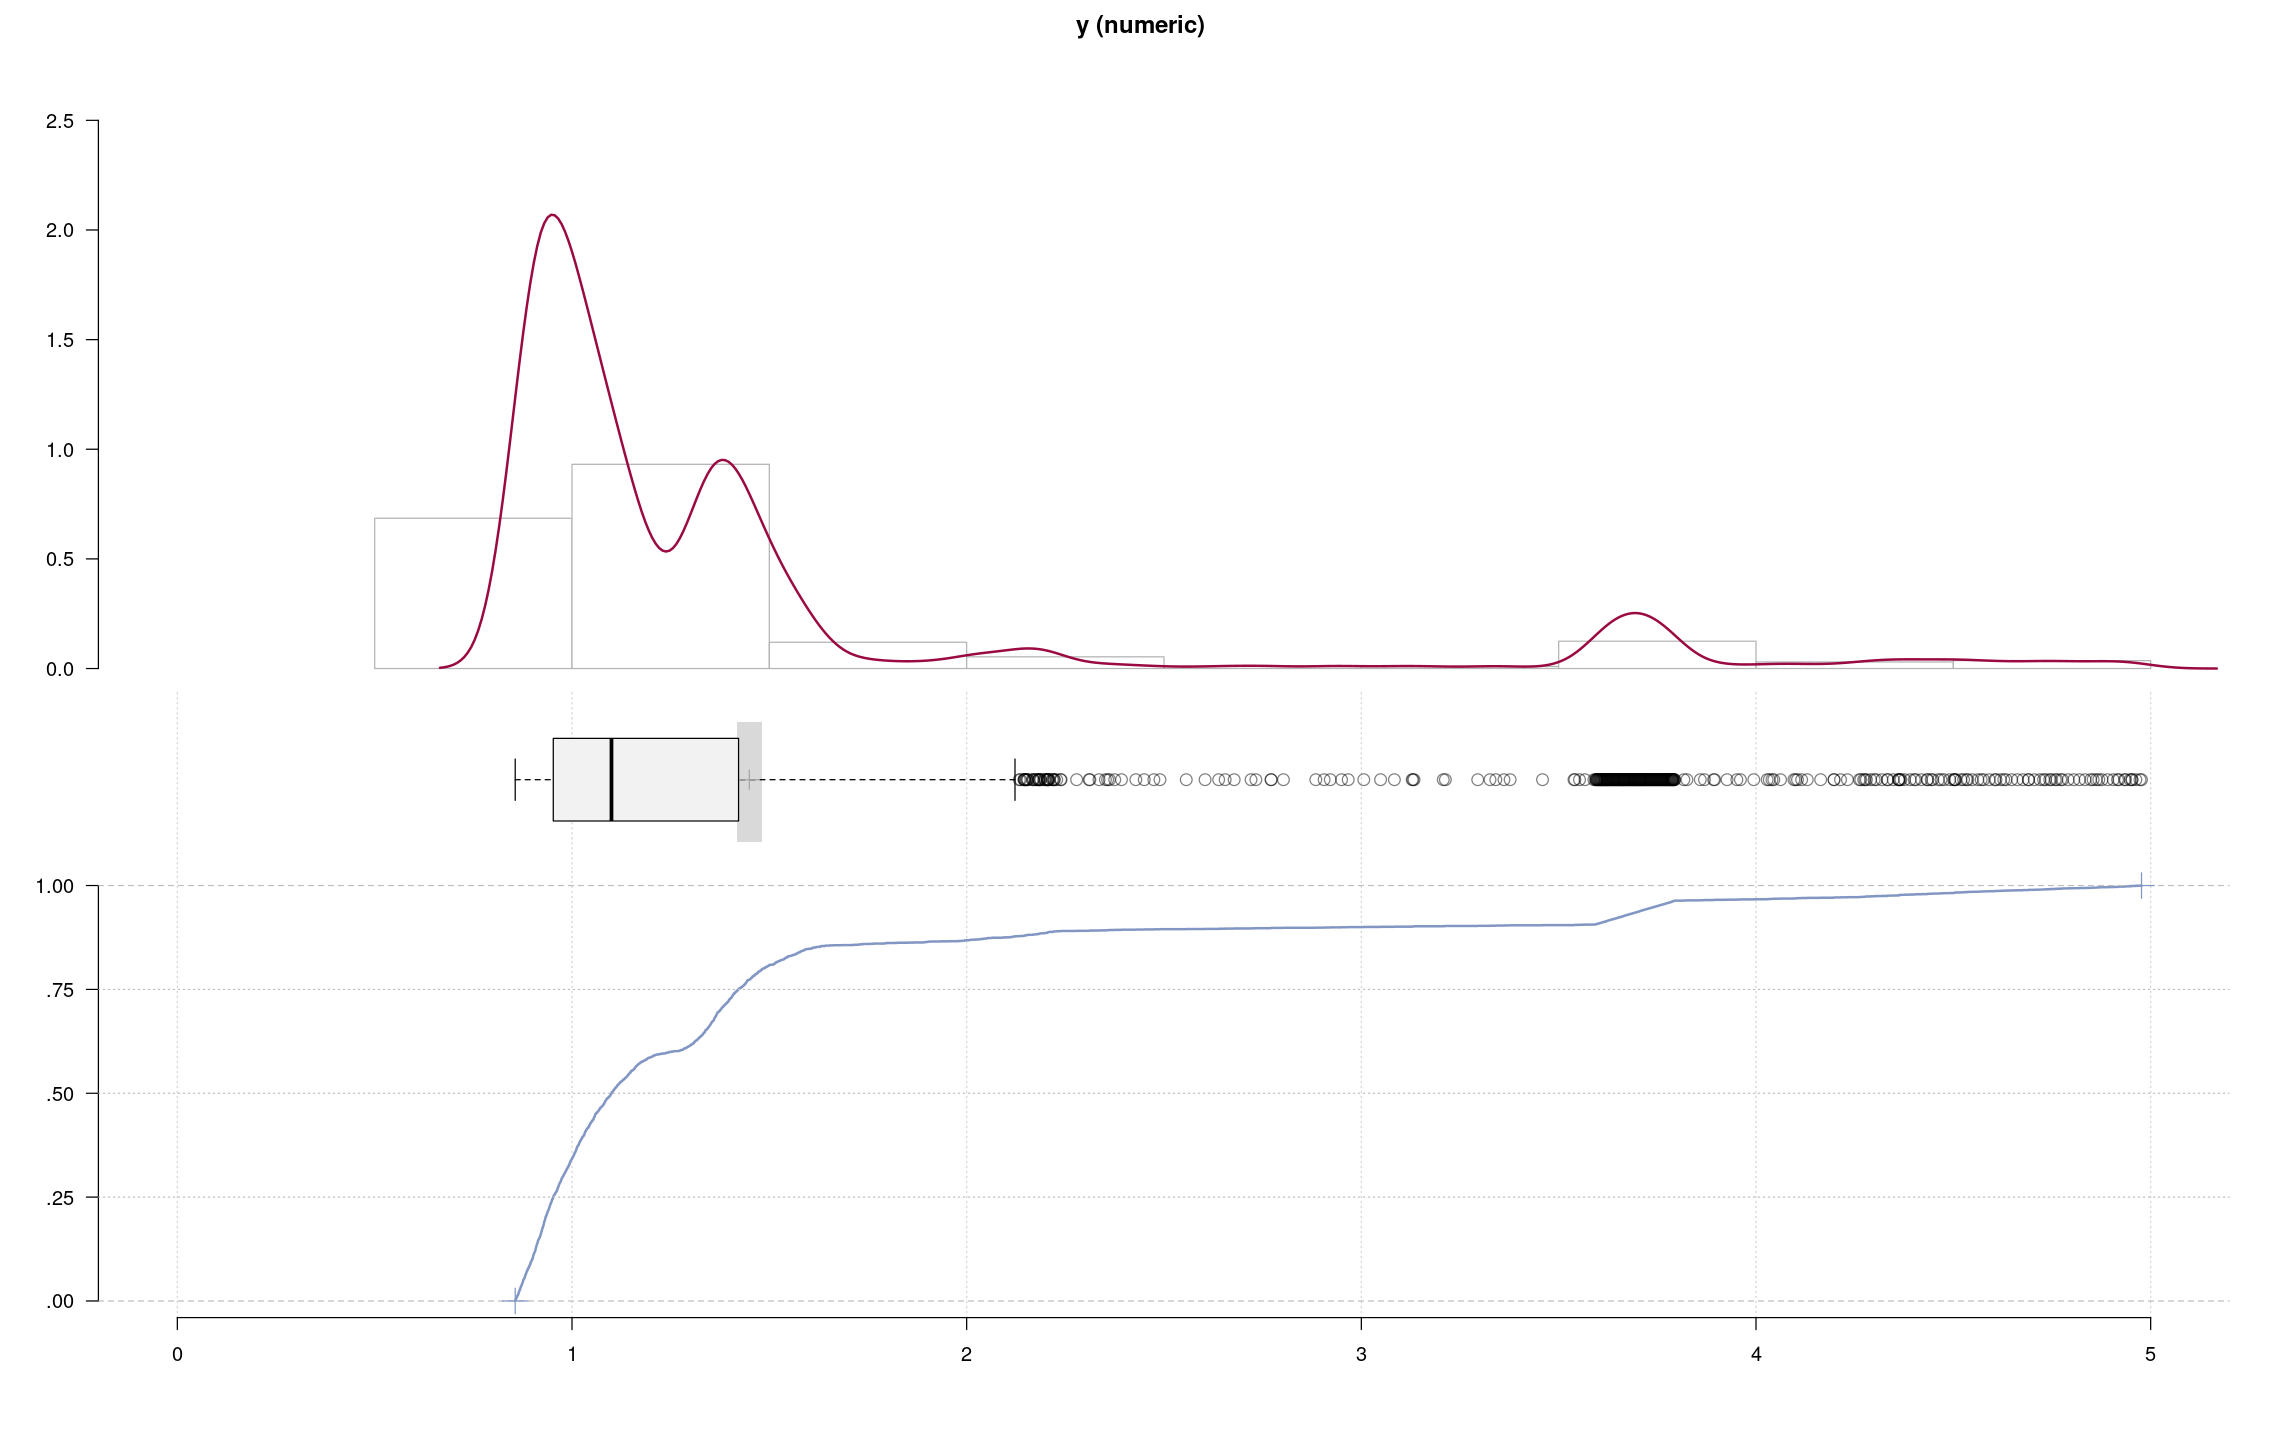

In [32]:
options(repr.plot.width=19, repr.plot.height=12)

nlargest <- 3000
y <- extract_nlargest_sample(x, n = nlargest)
Desc(y)

# EVA: Stationary case

## Estimation

In [72]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = 3000,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [73]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "equivalent_block_sizes"               
 [3] "unequivalent_block_sizes"             
 [4] "selected_block_sizes"                 
 [5] "unselected_block_sizes"               
 [6] "use_uniform_prior"                    
 [7] "weights"                              
 [8] "frequencies"                          
 [9] "use_extremal_index"                   
[10] "extremal_indexes"                     
[11] "negative_log_likelihoods"             
[12] "information_criteria"                 
[13] "unnormalized_gev_parameters_object"   
[14] "normalized_gev_parameters_object"     
[15] "full_normalized_gev_parameters_object"
[16] "partial_data"                         
[17] "all_data"                             
[18] "selected_model_per_obs"               
[19] "selected_gev_models"                  
[20] "several_residuals"                    
[21] "several_residuals_fit"                
[22] "several_residuals_diagnosics"         


In [74]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

      loc_star   scale_star   shape_star
1  1.168268685 0.2225024900 0.9746440954
3  1.599530998 0.6062858792 0.9236948078
4  1.598754550 0.6001148053 0.9131674441
6  1.596313832 0.5814778222 0.8825315306
18 1.445467743 0.4349393025 0.8664349859
21 1.392498386 0.3795755216 0.8291358360
28 1.304128490 0.3056281017 0.8349214719


In [75]:
print(gev_mixture_model_object$weights)

            1             3             4             6            18 
0.36518259130 0.14707353677 0.00200100050 0.09804902451 0.02551275638 
           21            28 
0.23361680840 0.12856428214 


In [62]:
print(which.max(gev_mixture_model_object$weights))

2 
1 


In [63]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 14


In [64]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [65]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
4635.558866 4989.934553 


## Diagnostic

2              3              5              8             16 
0.323076923077 0.135451505017 0.007692307692 0.014381270903 0.017056856187 
            21             22             25             30             37 
0.024749163880 0.070234113712 0.132107023411 0.014046822742 0.030434782609 
            39             41             46             52             59 
0.081939799331 0.018060200669 0.029096989967 0.027424749164 0.074247491639

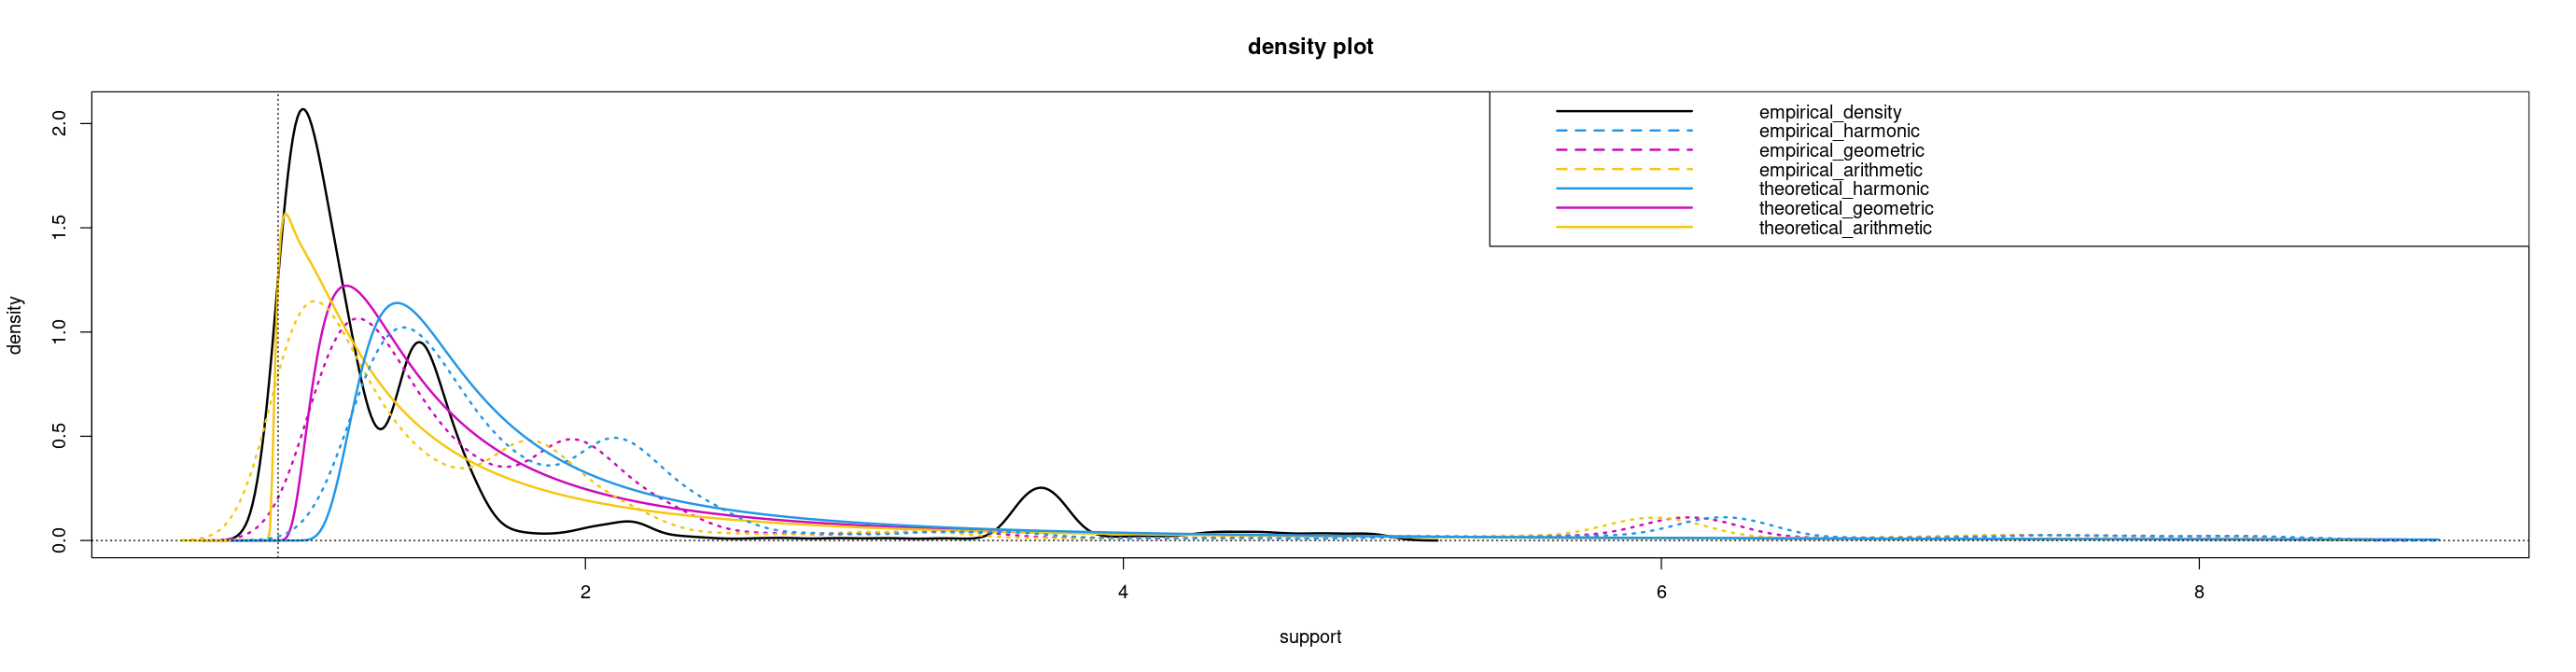

In [66]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

In [ ]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

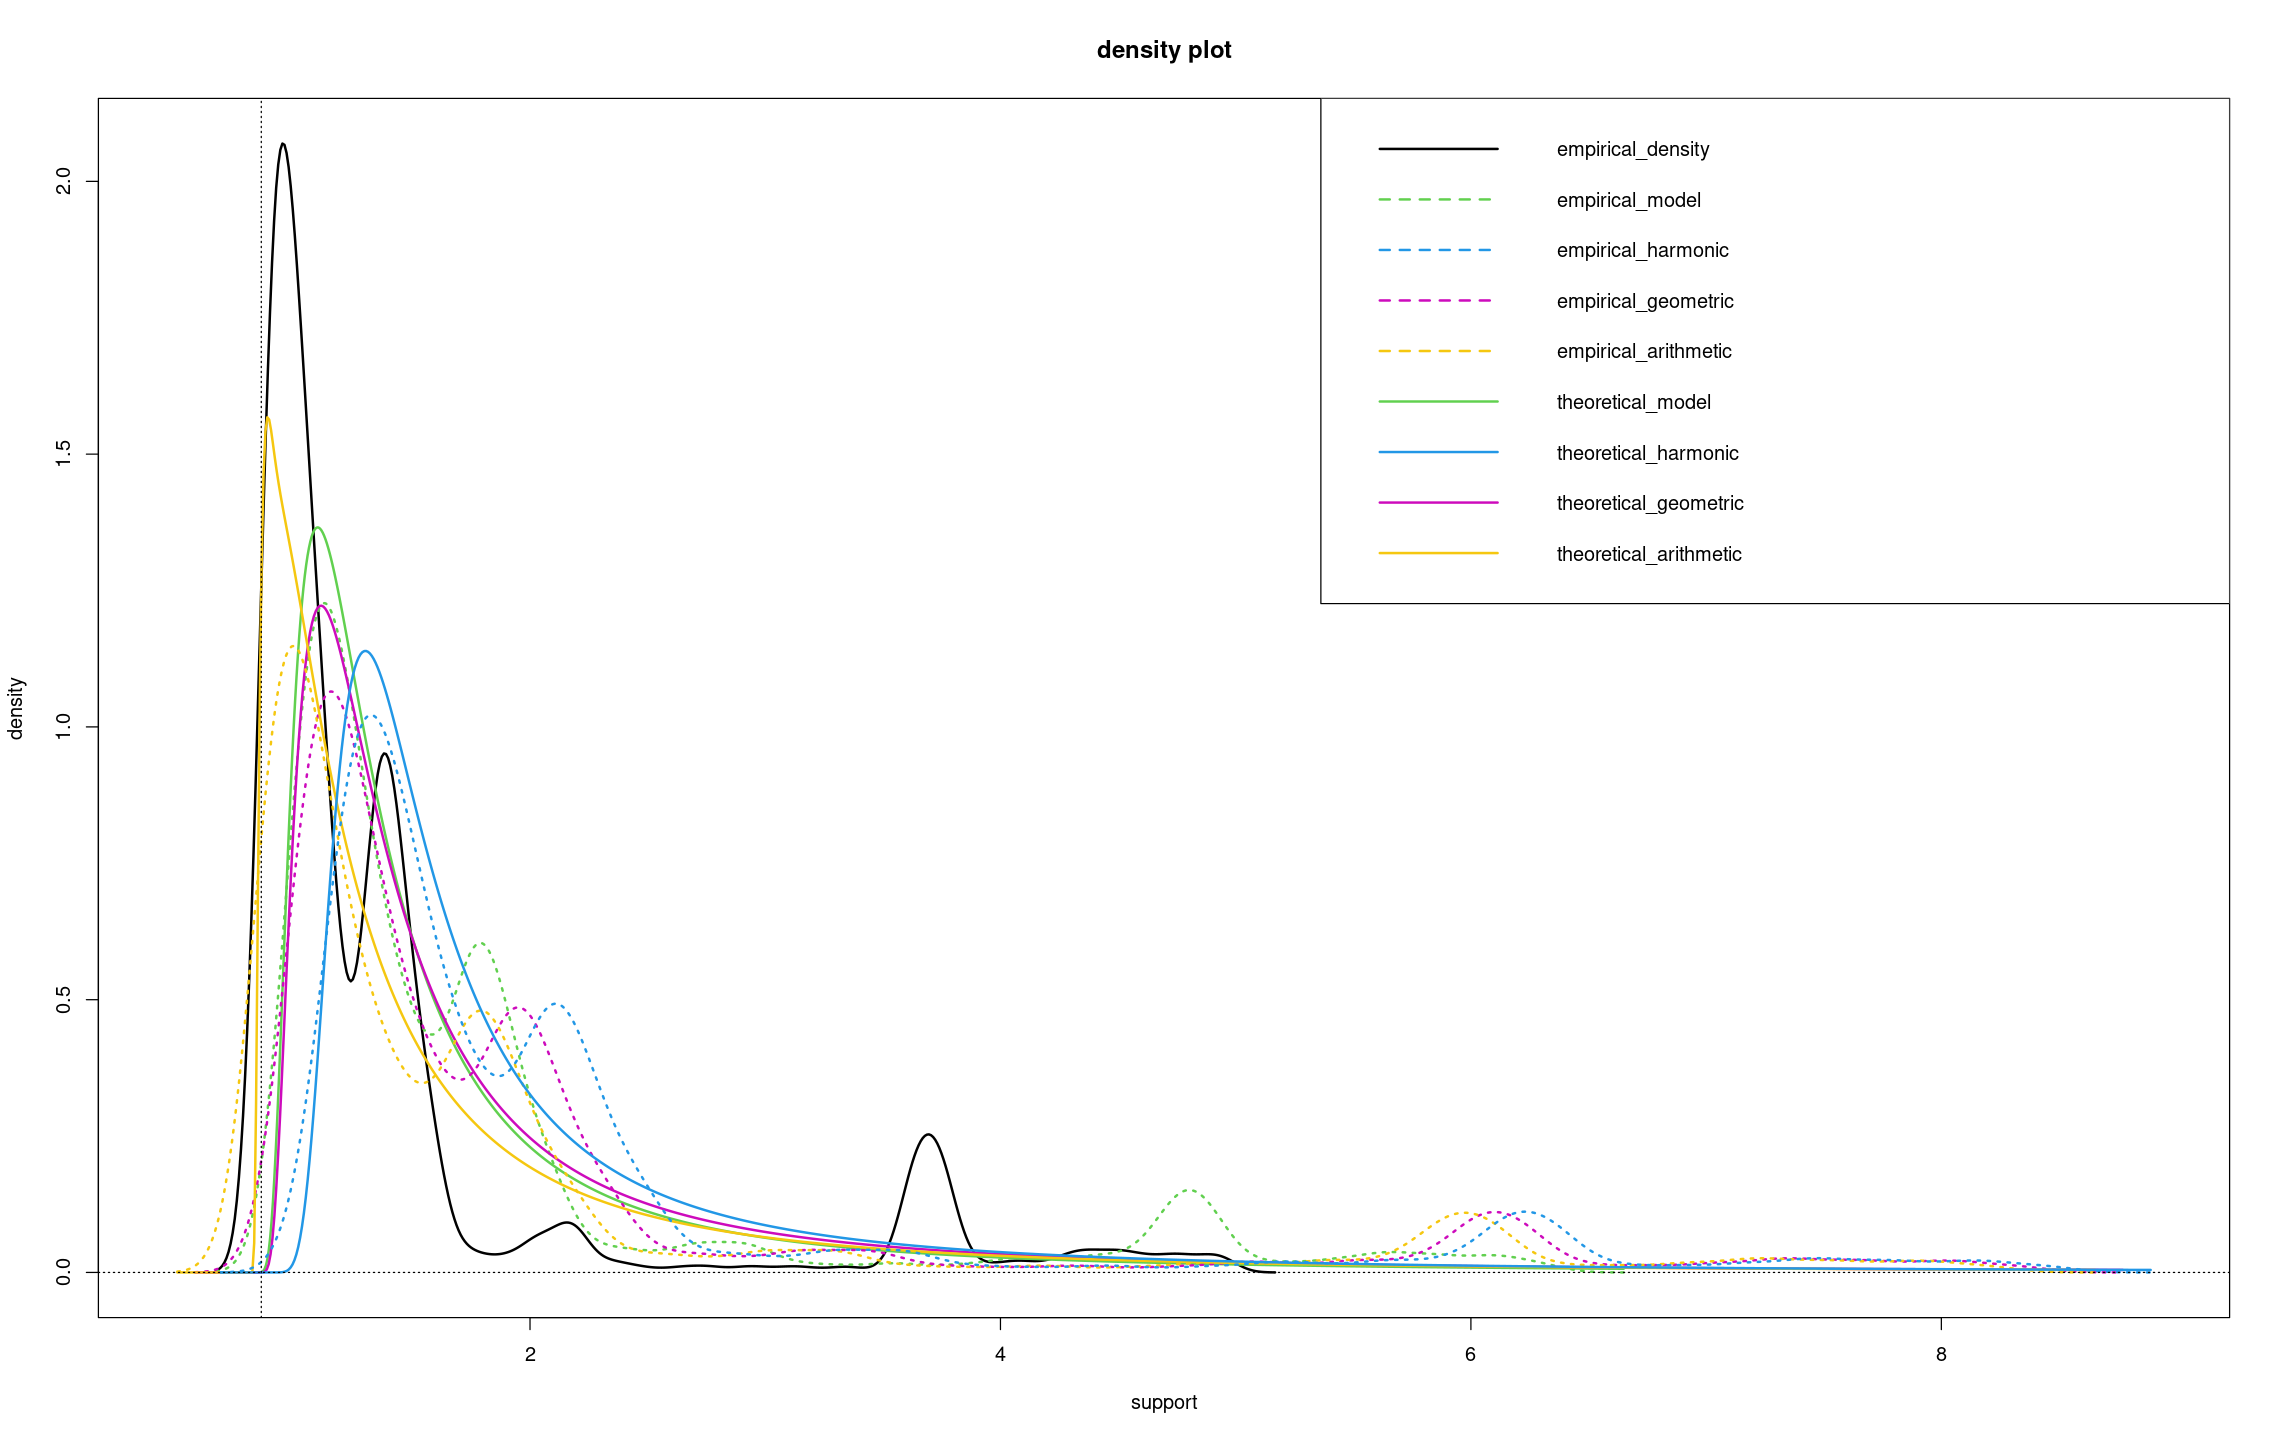

In [67]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [47]:
alpha <- n^(-2)

print(alpha)

[1] 1.915762362e-09


In [48]:
true_quantile <- NULL

print(true_quantile)

NULL


In [49]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

$quantiles_object
      lower_bound     estimate  upper_bound
2    -69703.91529  593874.0183 1257451.9519
3  -1275911.70823 4033169.8864 9342251.4810
5  -1384613.76676 2232033.3198 5848680.4064
8  -1650176.07477 1578864.9431 4807905.9611
16  -809695.10405  460671.1497 1731037.4035
21  -434273.28536  207086.7649  848446.8151
22  -868896.96319  412023.4768 1692943.9168
25  -635658.87266  273056.4290 1181771.7306
30 -1482818.63185  463294.1500 2409406.9319
37  -847228.50349  238950.6549 1325129.8133
39 -1855124.96304  501816.9318 2858758.8267
41 -1187475.24957  307109.1169 1801693.4833
46 -1846222.48846  422156.9873 2690536.4631
52 -6862672.67052 1477302.1641 9817276.9986
59  -818675.04027  191316.2898 1201307.6199

$gev_mixture_model_quantile
[1] 1089458.712

$smalest_lower_ci_bound
[1] -6862672.671

$largest_upper_ci_bound
[1] 9817276.999

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 2434660.591 6387773.827 10340887.06

$quantile_gev_sup
  lower_bound    estimate upper_bound
1 25535.87333 59869.87164 94203.86995

In [52]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

$quantiles_object
      lower_bound     estimate  upper_bound
2    -69703.91529  593874.0183 1257451.9519
3  -1275911.70823 4033169.8864 9342251.4810
5  -1384613.76676 2232033.3198 5848680.4064
8  -1650176.07477 1578864.9431 4807905.9611
16  -809695.10405  460671.1497 1731037.4035
21  -434273.28536  207086.7649  848446.8151
22  -868896.96319  412023.4768 1692943.9168
25  -635658.87266  273056.4290 1181771.7306
30 -1482818.63185  463294.1500 2409406.9319
37  -847228.50349  238950.6549 1325129.8133
39 -1855124.96304  501816.9318 2858758.8267
41 -1187475.24957  307109.1169 1801693.4833
46 -1846222.48846  422156.9873 2690536.4631
52 -6862672.67052 1477302.1641 9817276.9986
59  -818675.04027  191316.2898 1201307.6199

$gev_mixture_model_quantile
[1] 1089458.695

$smalest_lower_ci_bound
[1] -6862672.671

$largest_upper_ci_bound
[1] 9817276.999

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 2434660.591 6387773.827 10340887.06

$quantile_gev_sup
  lower_bound    estimate upper_bound
1 25535.87333 59869.87164 94203.86995

In [53]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

$quantiles_object
      lower_bound     estimate  upper_bound
2    -69703.91529  593874.0183 1257451.9519
3  -1275911.70823 4033169.8864 9342251.4810
5  -1384613.76676 2232033.3198 5848680.4064
8  -1650176.07477 1578864.9431 4807905.9611
16  -809695.10405  460671.1497 1731037.4035
21  -434273.28536  207086.7649  848446.8151
22  -868896.96319  412023.4768 1692943.9168
25  -635658.87266  273056.4290 1181771.7306
30 -1482818.63185  463294.1500 2409406.9319
37  -847228.50349  238950.6549 1325129.8133
39 -1855124.96304  501816.9318 2858758.8267
41 -1187475.24957  307109.1169 1801693.4833
46 -1846222.48846  422156.9873 2690536.4631
52 -6862672.67052 1477302.1641 9817276.9986
59  -818675.04027  191316.2898 1201307.6199

$gev_mixture_model_quantile
[1] 1089458.723

$smalest_lower_ci_bound
[1] -6862672.671

$largest_upper_ci_bound
[1] 9817276.999

$quantile_gev_inf
  lower_bound    estimate upper_bound
1 2434660.591 6387773.827 10340887.06

$quantile_gev_sup
  lower_bound    estimate upper_bound
1 25535.87333 59869.87164 94203.86995

In [45]:
options(repr.plot.width=23, repr.plot.height=6)

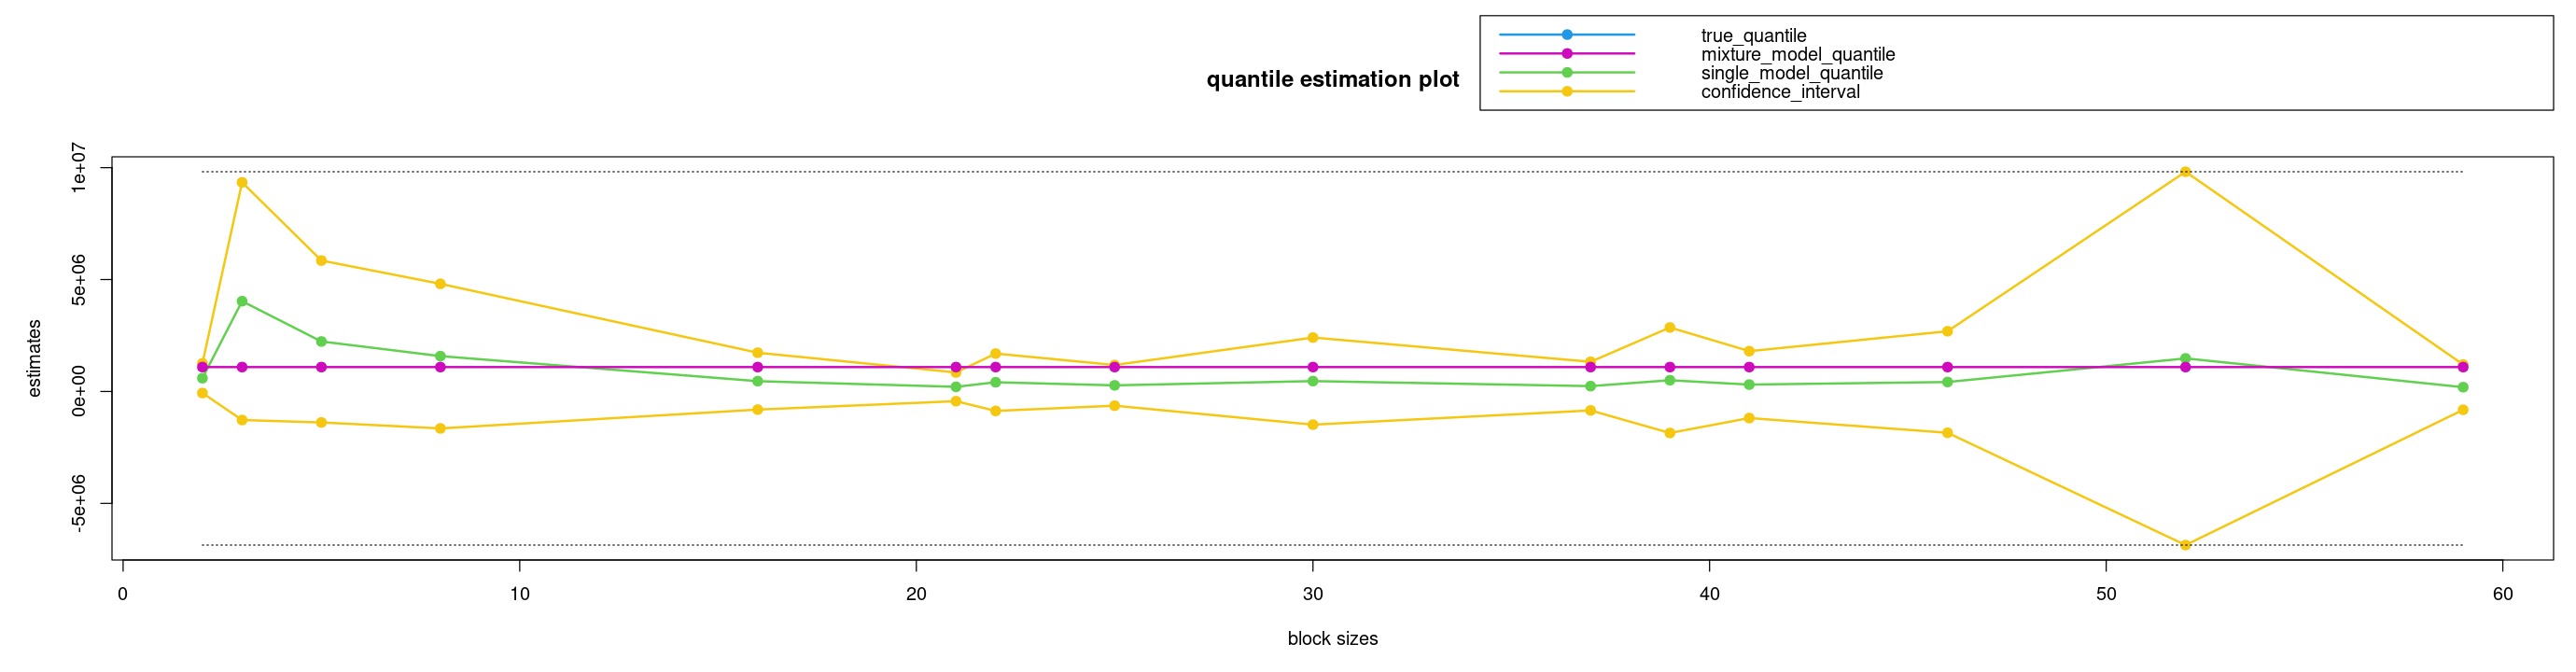

In [57]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")

# EVA: Non-stationary case

In [47]:
print(names(data))

 [1] "timestamp"              "latitude"               "longitude"             
 [4] "velocity_latitude"      "velocity_longitude"     "velocity"              
 [7] "lateral_error"          "longitudinal_error"     "haversine_error"       
[10] "latitude_error"         "longitude_error"        "heading_error"         
[13] "lateral_error_abs"      "longitudinal_error_abs" "haversine_error_abs"   
[16] "latitude_error_abs"     "longitude_error_abs"    "heading_error_abs"     
[19] "area"                   "object"                 "name_airplane"         
[22] "name_bench"             "name_bench..group."     "name_bicycle"          
[25] "name_bird"              "name_bird..group."      "name_boat"             
[28] "name_bus"               "name_car"               "name_car..group."      
[31] "name_dog"               "name_electric.pole"     "name_fence"            
[34] "name_fire.hydrant"      "name_gas.station"       "name_helicopter"       
[37] "name_house"             "name_hous

In [48]:
data_covariates <- data %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
data_covariates <- na.omit(data_covariates)

In [49]:
data_covariates <- data_clean %>% select(velocity_latitude, velocity_longitude, velocity, area, object)
data_covariates <- na.omit(data_covariates)

In [50]:
tail(data_covariates)

velocity_latitude velocity_longitude velocity        area         object
1 -1.940983719e-12  7.435616186e-13    2.078533541e-12 0.5983367151 17    
2 -1.363411577e-12  5.330692871e-13    1.463917345e-12 0.5661612699 18    
3 -1.173312364e-12  4.772723125e-13    1.266669161e-12 0.6322046775 20    
4 -1.267666481e-12  5.446311827e-13    1.379710634e-12 0.6057293744 20    
5 -6.827273381e-13  3.380506526e-13    7.618365060e-13 0.6087681255 20    
6 -4.829062301e-13  3.187162538e-13    5.786004473e-13 0.5587587651 20

In [51]:
data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = NULL)

In [52]:
tail(data_covariates_scaled)

velocity_latitude velocity_longitude velocity     area         
22536 -0.041995691003   0.013863961170     -1.584760725 -0.9621822143
22537 -0.028950826673   0.011107717471     -1.598073884 -1.0593990457
22538 -0.024657305121   0.010377096746     -1.602346463 -0.8598515090
22539 -0.026788357788   0.011259112069     -1.599897879 -0.9398455871
22540 -0.013577104675   0.008554090558     -1.613281608 -0.9306641213
22541 -0.009064007431   0.008300920694     -1.617250671 -1.0817654202
      object      
22536 -1.475483021
22537 -1.386480857
22538 -1.208476528
22539 -1.208476528
22540 -1.208476528
22541 -1.208476528

In [224]:
#Desc(data_covariates_scaled$velocity_latitude)

In [101]:
#Desc(data_covariates_scaled$velocity_longitude)

In [102]:
#Desc(data_covariates_scaled$velocity)

In [103]:
#Desc(data_covariates_scaled$area)

In [104]:
#Desc(data_covariates_scaled$object)

## Estimation

In [295]:
print(names(data_covariates_scaled))

[1] "velocity_latitude"  "velocity_longitude" "velocity"          
[4] "area"               "object"            


In [60]:

ns_gev_mixture_model_object <- fit_non_stationary_gev_mixture_model(x = x[-1],
                                                                    data = data_covariates_scaled,
                                                                    location.fun = ~ object,
                                                                    scale.fun = ~ 1,
                                                                    shape.fun = ~ 1,
                                                                    use.phi = FALSE,
                                                                    nlargest = 3000,
                                                                    block_sizes = NULL,
                                                                    minimum_nblocks = 50,
                                                                    threshold = NULL,
                                                                    confidence_level = 0.95,
                                                                    use_extremal_index = TRUE,
                                                                    use_uniform_prior = FALSE,
                                                                    method = c("MLE", "GMLE")[1])



ERROR: Error in get_candidate_block_sizes(x = partial_data, threshold = threshold, : The provided minimum number of blocks, 20 is too large! Please, consider using a smaller number.


In [57]:
print(names(ns_gev_mixture_model_object))

[1] 22541

In [58]:
print(ns_gev_mixture_model_object$selected_ns_gev_coefficients)

[1] 22541     5

In [ ]:
print(ns_gev_mixture_model_object$weights)

In [373]:
print(ns_gev_mixture_model_object$information_criteria)

[1] 2


## Diagnostic

In [380]:
plot_fit_non_stationary_gev_mixture_model.R(ns_gev_mixture_model_object,
                                            data_index = 0,
                                            model_index = 0,
                                            iterations = 10,
                                            xlab = "support",
                                            ylab = "density",
                                            main = "density plot",
                                            legend_position = "topright")

[[1]]
extRemes::fevd(x = residuals, type = "GEV", method = "MLE")

[1] "Normal Approx."

           95% lower CI       Estimate    95% upper CI
location -0.04703636600 -0.02647245750 -0.005908548994
scale     0.96385003310  0.97951779927  0.995185565444
shape     0.03226559697  0.04999282688  0.067720056787


[[2]]
extRemes::fevd(x = residuals, type = "GEV", method = "MLE")

[1] "Normal Approx."

            95% lower CI       Estimate   95% upper CI
location -0.006722448822  0.01537274769  0.03746794421
scale     0.993859736706  1.01010886035  1.02635798400
shape    -0.043555044005 -0.02815672430 -0.01275840459




plot_fit_non_stationary_gev_mixture_model.R(ns_gev_mixture_model_object,
                                            data_index = 0,
                                            model_index = 1,
                                            iterations = 10,
                                            xlab = "support",
                                            ylab = "density",
                                            main = "density plot",
                                            legend_position = "topright")

## Quantiles

In [384]:
tail(data_covariates)

velocity_latitude velocity_longitude velocity        area         object
1 -1.940983719e-12  7.435616186e-13    2.078533541e-12 0.5983367151 17    
2 -1.363411577e-12  5.330692871e-13    1.463917345e-12 0.5661612699 18    
3 -1.173312364e-12  4.772723125e-13    1.266669161e-12 0.6322046775 20    
4 -1.267666481e-12  5.446311827e-13    1.379710634e-12 0.6057293744 20    
5 -6.827273381e-13  3.380506526e-13    7.618365060e-13 0.6087681255 20    
6 -4.829062301e-13  3.187162538e-13    5.786004473e-13 0.5587587651 20

In [396]:
new_data_covariates <- data.frame(velocity_latitude = -7*10^(-12),
                       velocity_longitude = 5*10^(-13),
                       velocity = 10^(-12),
                       area = 0.8,
                       object = 10)

new_data_covariates

velocity_latitude velocity_longitude velocity area object
1 -7e-12            5e-13              1e-12    0.8  10

In [397]:
new_data_covariates_scaled <- get_standard_scaled_data(data_covariates, newdata = new_data_covariates)
new_data_covariates_scaled

velocity_latitude velocity_longitude velocity     area          object      
1 -0.1562570554     0.01067469925      -1.608122765 -0.3528645972 -2.098498172

In [398]:
ns_parameters <- sapply(cluster_models, function(model){
    get_ns_gev_model_parameters(model, new_data_covariates_scaled)
})

print(ns_parameters)

         [,1]          [,2]        
location 0.1559324018  0.6215876779
scale    0.08544904755 0.1795371308
shape    -0.2073158847 0.3163308429


In [399]:
ns_weights <- ns_gev_model$cluster_weights
print(ns_weights)

[1] 0.5372432456 0.4627567544


In [400]:
alpha <- 10^(-14)

In [401]:
alpha <- 1/(22542*1)

In [402]:
rl_geometric <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = as.numeric(ns_parameters["location", ]),
                                                   scales = as.numeric(ns_parameters["scale", ]),
                                                   shapes = as.numeric(ns_parameters["shape", ]),
                                                   weights = ns_weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[1])

print(rl_geometric)

[1] 10.64988669


In [403]:
rl_arithmetic <- calculate_gev_mixture_model_inverse_cdf(p = 1 - alpha,
                                                   locations = as.numeric(ns_parameters["location", ]),
                                                   scales = as.numeric(ns_parameters["scale", ]),
                                                   shapes = as.numeric(ns_parameters["shape", ]),
                                                   weights = ns_weights,
                                                   iterations = 100,
                                                   kind = c("geometric", "arithmetic")[2])

print(rl_arithmetic)

[1] 10.64980037
